# Comprehensive Aircraft Risk Assessment for a startup business operations 

# Business Understanding 

### PROBLEM STATEMENT
In order to diversify our business portfolio,we decided to expand into the aviation industry by acquiring aircrafts for both commercial and private operations.This expansion though an excellent idea presents significant challenges of a risky nature that come along with owning and operating aircraft.Since the company has little experience in the aviation sector,there is therefore a need to identify which aircraft models have the lowest risks.This will therefore help in ensuring that the company will be on the right track as it ventures into this market.

The goal of this project is to conduct a comprehensive analysis of various aircrafts as well as evaluating the probable risks therefore determining which models are the most reliable to be used by the company.By leveraging data-driven insights, we aim to identify aircrafts that will minimize potential risks and maximize return on investment.
The findings from this analysis will be translated into actionable insights that the head of the new aviation division can use to make informed decisions on aircraft acquisition. These insights will help the company make strategic choices about which aircrafts are best suited for commercial and private enterprises, ensuring a smooth and successful entry into the aviation industry while mitigating risks and optimizing profitability.

This project will benefit stakeholders by providing data-driven insights that inform better decision-making regarding aircraft purchases, ultimately minimizing financial risks. By identifying low-risk aircraft, the company can enhance operational efficiency, ensure regulatory compliance, and improve customer satisfaction through reliable service. Additionally, these efforts will strengthen the company’s reputation in the aviation industry and position it for strategic growth, benefiting investors and shareholders with the potential for increased revenue and market share.
    
### GOALS
Find the variables that make an airplane the safest and provide business recommendations based on these findings.
    
### OBJECTIVES
  1.To identify the lowest-risk aircraft to be bought by the company as it ventures into the aviation business.
  2.To minimize any financial losses and ensure that the business is profitable to the company.
      
### LIMITATION
 The company is relatively new to the aviation sector and therefore it lacks knowledge on how to navigate the market as well as the types of aircrafts that will be low risk to the company.
     

# Data Understanding #
The data understanding for this business startup entails evaluating various aircraft models to identify those with the lowest risks for both commercial and private operations.

In [1]:
#Importing libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#reading the csv file into a pandas DataFrame
df= pd.read_csv('aviation_data.csv',index_col=0,encoding='ISO-8859-1',low_memory=False)
df.head()


Investigation.Type Accident.Number  Event.Date  \
Event.Id                                                        
20001218X45444           Accident      SEA87LA080  1948-10-24   
20001218X45447           Accident      LAX94LA336  1962-07-19   
20061025X01555           Accident      NYC07LA005  1974-08-30   
20001218X45448           Accident      LAX96LA321  1977-06-19   
20041105X01764           Accident      CHI79FA064  1979-08-02   

                       Location        Country   Latitude   Longitude  \
Event.Id                                                                
20001218X45444  MOOSE CREEK, ID  United States        NaN         NaN   
20001218X45447   BRIDGEPORT, CA  United States        NaN         NaN   
20061025X01555    Saltville, VA  United States  36.922223  -81.878056   
20001218X45448       EUREKA, CA  United States        NaN         NaN   
20041105X01764       Canton, OH  United States        NaN         NaN   

               Airport.Code Airport.Name Injury.Severity  ...  \
Event.Id                                                  ...   
20001218X45444          NaN          NaN        Fatal(2)  ...   
20001218X45447          NaN          NaN        Fatal(4)  ...   
20061025X01555          NaN          NaN        Fatal(3)  ...   
20001218X45448          NaN          NaN        Fatal(2)  ...   
20041105X01764          NaN          NaN        Fatal(1)  ...   

               Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
Event.Id                                                            
20001218X45444          Personal         NaN                  2.0   
20001218X45447          Personal         NaN                  4.0   
20061025X01555          Personal         NaN                  3.0   
20001218X45448          Personal         NaN                  2.0   
20041105X01764          Personal         NaN                  1.0   

               Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
Event.Id                                                                     
20001218X45444                    0.0                  0.0             0.0   
20001218X45447                    0.0                  0.0             0.0   
20061025X01555                    NaN                  NaN             NaN   
20001218X45448                    0.0                  0.0             0.0   
20041105X01764                    2.0                  NaN             0.0   

                Weather.Condition Broad.phase.of.flight   Report.Status  \
Event.Id                                                                  
20001218X45444                UNK                Cruise  Probable Cause   
20001218X45447                UNK               Unknown  Probable Cause   
20061025X01555                IMC                Cruise  Probable Cause   
20001218X45448                IMC                Cruise  Probable Cause   
20041105X01764                VMC              Approach  Probable Cause   

               Publication.Date  
Event.Id                         
20001218X45444              NaN  
20001218X45447       19-09-1996  
20061025X01555       26-02-2007  
20001218X45448       12-09-2000  
20041105X01764       16-04-1980  

[5 rows x 30 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50249 non-null  object 
 8   Airport.Name            52790 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87572 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [4]:
df.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

## #Source

The data to be used for this project was gathered from Kaggle.The dataset originates from the National Transportation Safety Board (NTSB) aviation accident database, which has been documenting civil aviation accidents and selected incidents in the United States and its territories since 1962. This database provides preliminary reports shortly after accidents occur, with factual information being updated as investigations progress. Once investigations are complete, preliminary reports are replaced with final reports that detail the accident and its probable causes. It’s important to note that full narrative descriptions may not be available for incidents prior to 1993, those under revision, or cases not primarily investigated by the NTSB. The goal of this dataset is to enhance the quality and safety of air travel by analyzing aviation incidents.
    
### Shape and Size
 
### Data Types

In [5]:
df.shape

(88889, 30)

In [6]:
df.size

2666670

In [7]:
df.dtypes

Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Da

In [8]:
df.keys()

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# DATA PREPARATION #

# Data Cleaning #


In [9]:
#unique_columns = [col for col in df.columns if df[col].is_unique]
#unique_columns
unique_values_all = {col: df[col].unique() for col in df.columns}
unique_values_all

{'Investigation.Type': array(['Accident', 'Incident'], dtype=object),
 'Accident.Number': array(['SEA87LA080', 'LAX94LA336', 'NYC07LA005', ..., 'WPR23LA075',
        'WPR23LA076', 'ERA23LA097'], dtype=object),
 'Event.Date': array(['1948-10-24', '1962-07-19', '1974-08-30', ..., '2022-12-22',
        '2022-12-26', '2022-12-29'], dtype=object),
 'Location': array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', ...,
        'San Manual, AZ', 'Auburn Hills, MI', 'Brasnorte, '], dtype=object),
 'Country': array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
        'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
        'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
        'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
        'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
        'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
        'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
        '

### Identifying Missing Data

In [10]:
# is there any missing data
df.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [11]:
#get the percentage of missing data
df.isna().sum()/len(df)* 100


Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30

In [12]:
#handling missing data
# dropping data that has too many missing values preferably more than 40%
dropped_columns=[]
for x in df:
    if (df[x].isna().sum() / len(df[x])) * 100 > 40:
        dropped_columns.append(x)
dropped_columns



['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [13]:
df= df.drop(columns=dropped_columns)
df.columns


Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [14]:
df.isna().sum()/len(df)* 100


Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30.560587
Report.Status              7.178616
Publication.Date          15.492356
dtype: float64

### Handling Missing Values

In [15]:
#imputing numerical data
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(),inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(),inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(),inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode(),inplace=True)




In [16]:
#Handling remaining missing values by filling them with suitable data
df=df.fillna(method='ffill').fillna(method='bfill')

In [17]:
df.isna().sum()

Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [18]:
#count the occurrences of each unique value in the 'Make' column of the DataFrame 
df['Make'].value_counts()

Cessna                      22232
Piper                       12034
CESSNA                       4930
Beech                        4332
PIPER                        2843
                            ...  
Light Aero,inc. (ashley)        1
WYDER ROBERT G                  1
Arctic Aircraft Company         1
Kokes                           1
TRAXLER JOHN N                  1
Name: Make, Length: 8237, dtype: int64

In [19]:
df['Make'] = df['Make'].str.lower()
df['Make'].value_counts()

cessna               27162
piper                14877
beech                 5375
boeing                2749
bell                  2724
                     ...  
fehlner-shelton          1
lidster                  1
lonnie w. ratliff        1
mckeehan james f         1
lowther                  1
Name: Make, Length: 7587, dtype: int64

In [20]:
df[['Weather.Condition','Model','Aircraft.damage']].value_counts()

Weather.Condition  Model          Aircraft.damage
VMC                152            Substantial        1939
                   172            Substantial        1483
                   172N           Substantial         889
                   PA-28-140      Substantial         678
                   150            Substantial         674
                                                     ... 
                   Glasair II     Substantial           1
                                  Destroyed             1
                   Glasair I TD   Destroyed             1
                   Glasair FT II  Substantial           1
IMC                -737-222       Destroyed             1
Length: 18509, dtype: int64

In [21]:
df['Engine.Type']

Event.Id
20001218X45444    Reciprocating
20001218X45447    Reciprocating
20061025X01555    Reciprocating
20001218X45448    Reciprocating
20041105X01764    Reciprocating
                      ...      
20221227106491    Reciprocating
20221227106494    Reciprocating
20221227106497    Reciprocating
20221227106498    Reciprocating
20221230106513    Reciprocating
Name: Engine.Type, Length: 88889, dtype: object

In [22]:
df.info(['Engine.Type'])

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88889 non-null  object 
 4   Country                 88889 non-null  object 
 5   Injury.Severity         88889 non-null  object 
 6   Aircraft.damage         88889 non-null  object 
 7   Registration.Number     88889 non-null  object 
 8   Make                    88889 non-null  object 
 9   Model                   88889 non-null  object 
 10  Amateur.Built           88889 non-null  object 
 11  Number.of.Engines       88889 non-null  float64
 12  Engine.Type             88889 non-null  object 
 13  Purpose.of.flight       88889 non-null  object 
 14  Total.Fatal.Injuries 

In [23]:
df['Engine.Type'].value_counts()

Reciprocating      75277
Turbo Shaft         4293
Turbo Prop          3708
Turbo Fan           2732
Unknown             2062
Turbo Jet            750
None                  25
Geared Turbofan       18
Electric              16
NONE                   3
UNK                    2
LR                     2
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [24]:
df['Number.of.Engines'].value_counts()

1.0    74599
2.0    12013
0.0     1301
3.0      510
4.0      462
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [25]:
df['Aircraft.damage'].value_counts()

Substantial    66154
Destroyed      19631
Minor           2976
Unknown          128
Name: Aircraft.damage, dtype: int64

In [26]:
df['Purpose.of.flight'].value_counts()

Personal                     53396
Instructional                11502
Unknown                       6930
Aerial Application            4977
Business                      4262
Positioning                   1823
Other Work Use                1386
Aerial Observation             874
Ferry                          861
Public Aircraft                754
Executive/corporate            592
Flight Test                    475
Skydiving                      211
External Load                  143
Public Aircraft - Federal      122
Air Race show                  113
Banner Tow                     109
Public Aircraft - Local         84
Public Aircraft - State         69
Glider Tow                      64
Air Race/show                   62
Firefighting                    48
Air Drop                        14
ASHO                             9
PUBS                             8
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [27]:
df['Weather.Condition'].value_counts()

VMC    81501
IMC     6184
UNK      856
Unk      348
Name: Weather.Condition, dtype: int64

In [28]:
df['Publication.Date'].value_counts()


25-09-2020    17096
26-09-2020     1805
03-11-2020     1166
10-03-1988     1011
06-02-1995      848
              ...  
29-12-1999        1
18-08-2004        1
04-11-1999        1
24-10-2005        1
09-11-2007        1
Name: Publication.Date, Length: 2924, dtype: int64

In [29]:
df.info(['Event.Date'])

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88889 non-null  object 
 4   Country                 88889 non-null  object 
 5   Injury.Severity         88889 non-null  object 
 6   Aircraft.damage         88889 non-null  object 
 7   Registration.Number     88889 non-null  object 
 8   Make                    88889 non-null  object 
 9   Model                   88889 non-null  object 
 10  Amateur.Built           88889 non-null  object 
 11  Number.of.Engines       88889 non-null  float64
 12  Engine.Type             88889 non-null  object 
 13  Purpose.of.flight       88889 non-null  object 
 14  Total.Fatal.Injuries 

In [30]:
df['Injury.Severity'] = ['Fatal' if item[0:5]=='Fatal' else item for item in df['Injury.Severity']]

In [31]:
df['Injury.Severity'].value_counts()

Non-Fatal      68124
Fatal          18035
Incident        2219
Minor            233
Serious          182
Unavailable       96
Name: Injury.Severity, dtype: int64

In [32]:
df[['Injury.Severity','Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]

Injury.Severity  Total.Fatal.Injuries  Total.Serious.Injuries  \
Event.Id                                                                       
20001218X45444           Fatal                   2.0                     0.0   
20001218X45447           Fatal                   4.0                     0.0   
20061025X01555           Fatal                   3.0                     0.0   
20001218X45448           Fatal                   2.0                     0.0   
20041105X01764           Fatal                   1.0                     2.0   
...                        ...                   ...                     ...   
20221227106491           Minor                   0.0                     1.0   
20221227106494           Minor                   0.0                     0.0   
20221227106497       Non-Fatal                   0.0                     0.0   
20221227106498       Non-Fatal                   0.0                     0.0   
20221230106513           Minor                   0.0                     1.0   

                Total.Minor.Injuries  Total.Uninjured  
Event.Id                                               
20001218X45444                   0.0              0.0  
20001218X45447                   0.0              0.0  
20061025X01555                   0.0              1.0  
20001218X45448                   0.0              0.0  
20041105X01764                   0.0              0.0  
...                              ...              ...  
20221227106491                   0.0              0.0  
20221227106494                   0.0              0.0  
20221227106497                   0.0              1.0  
20221227106498                   0.0              0.0  
20221230106513                   0.0              1.0  

[88889 rows x 5 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88889 non-null  object 
 4   Country                 88889 non-null  object 
 5   Injury.Severity         88889 non-null  object 
 6   Aircraft.damage         88889 non-null  object 
 7   Registration.Number     88889 non-null  object 
 8   Make                    88889 non-null  object 
 9   Model                   88889 non-null  object 
 10  Amateur.Built           88889 non-null  object 
 11  Number.of.Engines       88889 non-null  float64
 12  Engine.Type             88889 non-null  object 
 13  Purpose.of.flight       88889 non-null  object 
 14  Total.Fatal.Injuries 

In [34]:
df.to_csv('df.csv', index=False)


# Data Analysis #

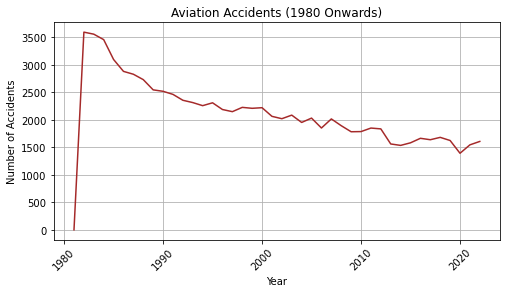

In [37]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Filter for years from 1980 onwards
df_filtered = df[df['Event.Date'].dt.year >= 1980]

# Count accidents by year
accidents_by_year = df_filtered['Event.Date'].dt.year.value_counts().sort_index()

# Plot accidents over time
plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-', color='brown')
plt.title('Aviation Accidents (1980 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

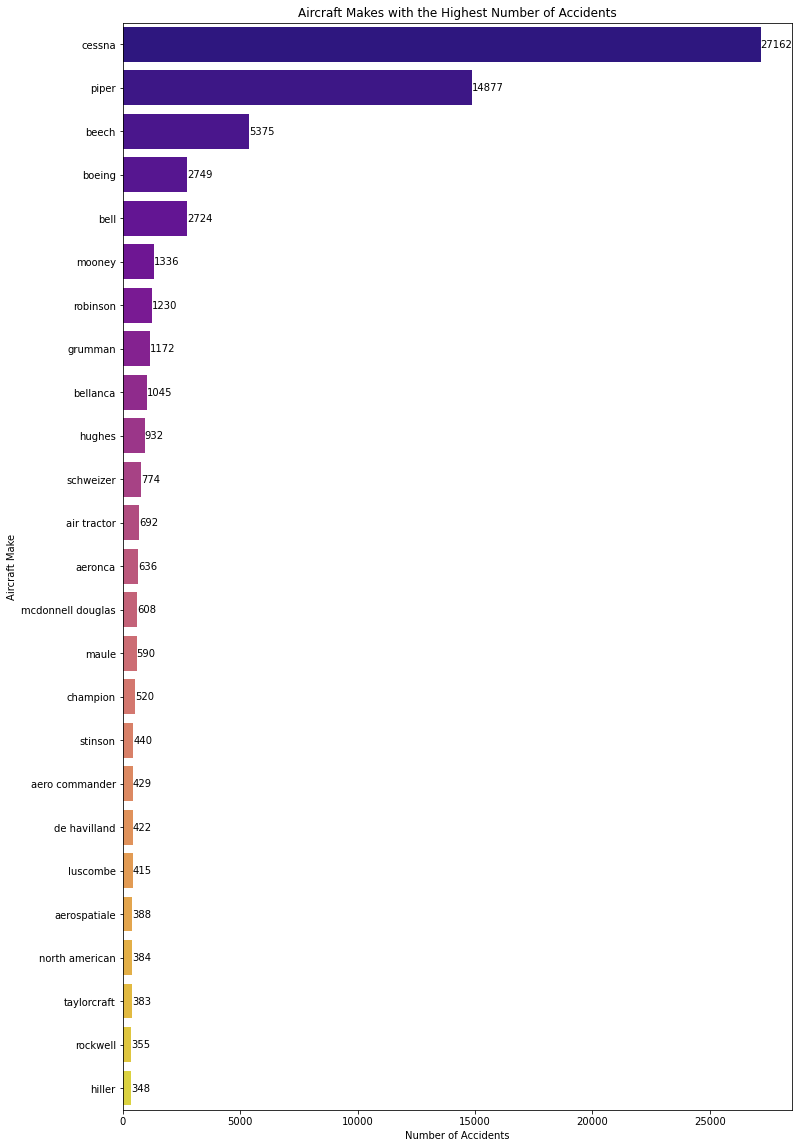

In [35]:
# Count accidents by 'Make'
accident_counts = df.groupby('Make').size().reset_index(name='accident_count')

# Sort and select the top 25 makes
top_accidents = accident_counts.sort_values(by='accident_count', ascending=False).head(25)

# Plotting the horizontal bar chart for the top aircraft makes with the most accidents
plt.figure(figsize=(12, 20))
sns.barplot(y='Make', x='accident_count', data=top_accidents, palette='plasma', orient='h')

# Adding data labels
for index, value in enumerate(top_accidents['accident_count']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.title('Aircraft Makes with the Highest Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.show()

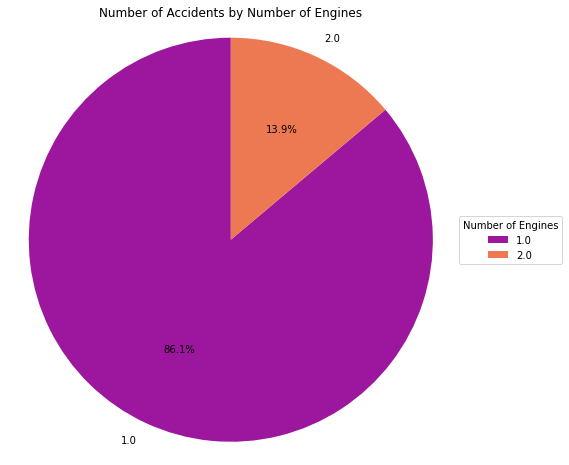

In [36]:
engine_counts = df[df['Number.of.Engines'].isin([1, 2])].groupby('Number.of.Engines').size()

# Plot the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('plasma', len(engine_counts))

# Include autopct to get percentage labels
wedges, texts, autotexts = plt.pie(engine_counts, 
                                    labels=engine_counts.index,  # Use the index for labels
                                    startangle=90, 
                                    colors=colors,
                                    autopct='%1.1f%%')  # Show percentage on the pie chart

plt.title('Number of Accidents by Number of Engines')
plt.axis('equal')  # Make the pie chart circular

# Add a legend to label what the colors represent
plt.legend(wedges, 
           engine_counts.index, 
           title='Number of Engines', 
           loc='center left', 
           bbox_to_anchor=(1, 0, 0.5, 1))  # Position the legend outside the pie chart

# Show the plot
plt.show()

The chart above compreensively explains that single engine aicrafts seem to have more accidents compared to aircrafts with two engines.

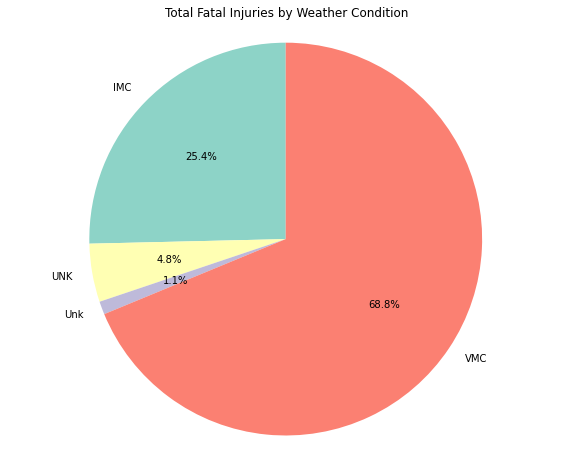

In [45]:
fatalities_by_weather = df.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(fatalities_by_weather, 
        labels=fatalities_by_weather.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(fatalities_by_weather)))

plt.title('Total Fatal Injuries by Weather Condition')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

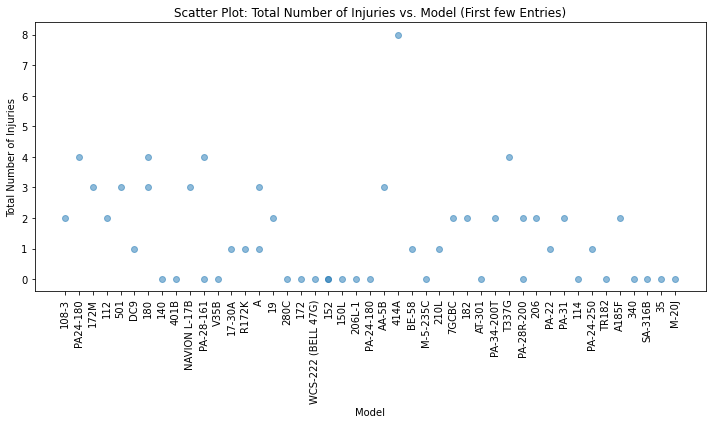

In [50]:
subset_data =df.head(50)

# Adding the injuries
Total_injuries = df['Total.Fatal.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Serious.Injuries']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['Model'], Total_injuries.head(50), alpha=0.5)
plt.xlabel('Model')
plt.ylabel('Total Number of Injuries')
plt.title('Scatter Plot: Total Number of Injuries vs. Model (First few Entries)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()